In [13]:
import json
import prepro

periodLengthMS = 1
sampleRateUS = 1


with open('datav1.json', 'r') as f:
    dsds = json.load(f)


In [14]:
labels = ["Gerade", "Kopfhaken", "Kinnhaken"]
label_counts = {label: 0 for label in labels}

for item in dsds:
    if item['label'] in labels:
        label_counts[item['label']] += 1

for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: Gerade, Count: 792
Label: Kopfhaken, Count: 736
Label: Kinnhaken, Count: 829


In [36]:
total_time_ns = sum(item['periodNS'] for item in dsds)
total_time_s = total_time_ns / 1e9 /3600
print(total_time_s)

1.072874183090268


In [13]:
import gradio as gr
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import json
import prepro
import matplotlib as plt





In [70]:
periodLengthMS = 1000
sampleRateUS = 10000

with open("fritz_daten.json", 'r') as f:
    dsds = json.load(f)

ds = prepro.jsonData_to_dataset_in_timedifference_us(dsds)

_df_new = prepro.normate_dataset_period(periodLengthMS, sampleRateUS, ds)

_df_list = pd.DataFrame({'idx': range(len(_df_new)), 'dfs': _df_new})['dfs'].values.tolist()

_x_train, _y_train = [], []

for df in _df_list:
    _y_train.append(df["label"].iloc[0])
    _x_train.append(df.drop(columns=["timestamp", "label"]).values)

_x_train = np.array(_x_train)
_y_train = np.array(_y_train)

_label = ['Gerade', 'Kinnhaken', 'Kopfhaken']
category_to_num = {element: num for num, element in enumerate(_label)}
numerical_data = np.vectorize(category_to_num.get)(_y_train)

_y_train = np.array(numerical_data)

mymodel = load_model('cnn.keras')
dings = mymodel.predict(_x_train)




Starting new normalization/interpolation...
progress: 10.00 %
progress: 20.00 %
progress: 30.00 %
progress: 40.00 %
progress: 50.00 %
progress: 60.00 %
progress: 70.00 %
progress: 80.00 %
progress: 90.00 %
Fertig, jetzt erstmal lecker Bierchen!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [71]:

num_to_category = {0: 'Gerade', 1: 'Kinnhaken', 2: 'Kopfhaken'}

list1 = []
predicted_classes = np.argmax(dings, axis=1)


for i in predicted_classes:
    list1.append(predicted_classes[i])

class_counts = np.bincount(predicted_classes)
gerade_count = class_counts[0]
kinnhaken_count = class_counts[1]
kopfhaken_count = class_counts[2]
total = gerade_count + kinnhaken_count + kopfhaken_count

print(dings)

[[9.4970798e-01 3.1160148e-02 1.9131908e-02]
 [9.8124850e-01 1.4694533e-02 4.0569948e-03]
 [5.1938498e-01 4.5429453e-01 2.6320457e-02]
 [3.6220376e-03 8.4661424e-01 1.4976373e-01]
 [2.7344567e-01 4.1156620e-01 3.1498814e-01]
 [7.1827514e-04 9.8883331e-01 1.0448391e-02]
 [7.6894643e-04 8.9055330e-01 1.0867773e-01]
 [3.6816120e-01 4.8862170e-02 5.8297658e-01]
 [7.9005532e-04 9.9022794e-01 8.9820083e-03]
 [9.8218876e-01 7.7256560e-03 1.0085505e-02]]


In [72]:


hoechster_wert_0 = max(dings, key=lambda x: x[0])[0]
hoechster_wert_1 = max(dings, key=lambda x: x[1])[1]
hoechster_wert_2 = max(dings, key=lambda x: x[2])[2]
index_hoechster_wert_0 = np.argmax(dings[:, 0])
index_hoechster_wert_1 = np.argmax(dings[:, 1])
index_hoechster_wert_2 = np.argmax(dings[:, 2])



In [73]:
_x_train[9]


array([[-1.35758257,  0.22292657, -1.30538856],
       [-1.2946112 ,  0.32299401, -1.34351091],
       [-1.25570775,  0.16365727, -1.2770307 ],
       [-1.20195348, -0.08172114, -1.01326403],
       [-1.14275663, -0.33892156, -0.71352587],
       [-1.1036211 , -0.5146459 , -0.49863   ],
       [-1.06241304, -0.50685688, -0.33379013],
       [-1.06192468, -0.30129147, -0.23833869],
       [-1.05623404, -0.0167109 , -0.24029764],
       [-0.97459314,  0.25466965, -0.38261042],
       [-0.87183353,  0.48486349, -0.48440543],
       [-0.77511464,  0.40656388, -0.50633265],
       [-0.72471499, -0.07027724, -0.43431422],
       [-0.70357184, -0.53501506, -0.29001494],
       [-0.6615547 , -0.76379139, -0.2127551 ],
       [-0.5811351 , -0.70379235, -0.25785583],
       [-0.54239951, -0.35849887, -0.33639213],
       [-0.55926732,  0.05116596, -0.38434826],
       [-0.57914987,  0.41306756, -0.42334419],
       [-0.61896469,  0.72645241, -0.39516987],
       [-0.68260775,  0.72827645, -0.352

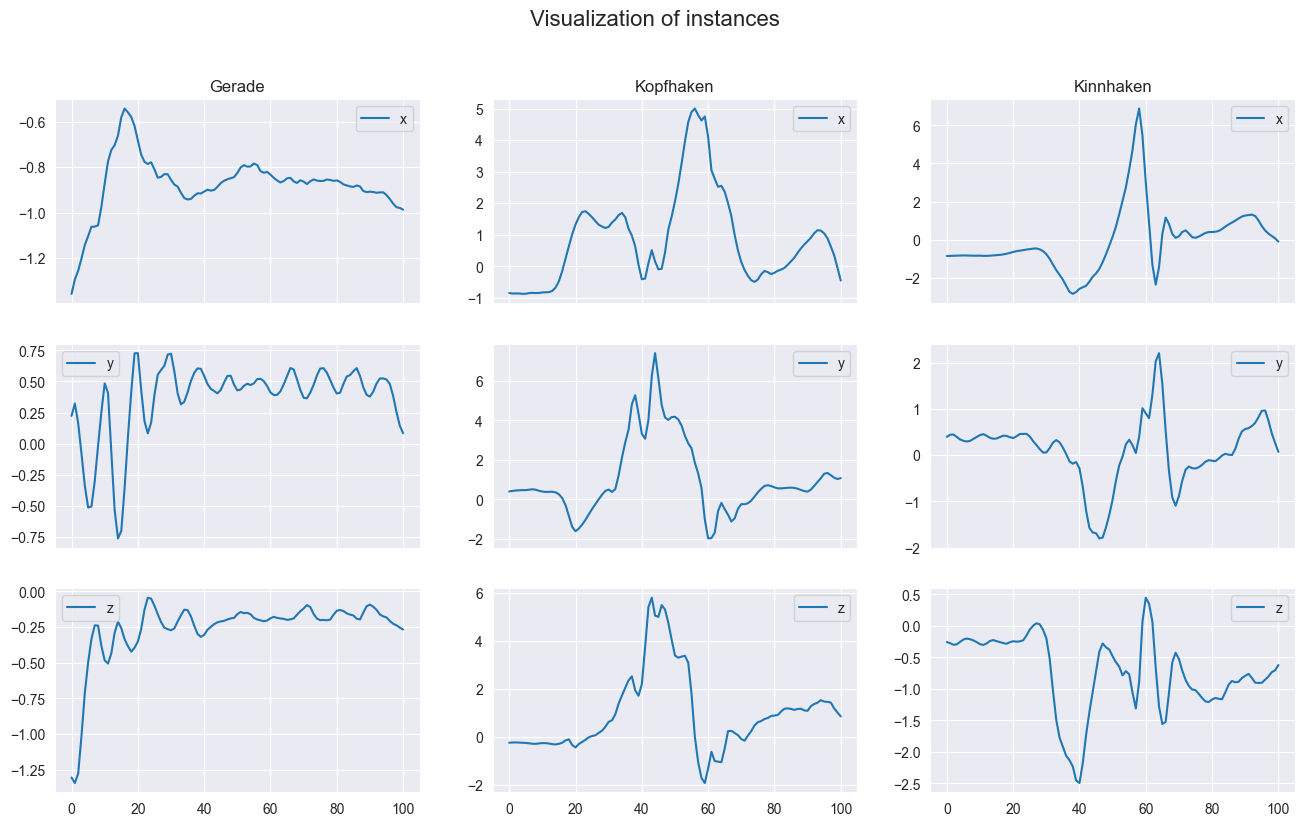

In [74]:
import matplotlib.pyplot as plt

def plot_instance(ax, instance, title):
    FEATURE_NAMES = ['x', 'y', 'z']

    # Plot the feature groups (all axis of one measurement) in the different subplots and add labels
    for subplot in [0, 1, 2]:
        ax[subplot].plot(instance[:, subplot])
        ax[subplot].legend([FEATURE_NAMES[subplot]])

    ax[0].set_title(title)

fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False)
fig.suptitle('Visualization of instances', fontsize=16)
fig.set_size_inches(16, 9)

# Plot _x_train[9]
plot_instance(axs[:, 0], _x_train[index_hoechster_wert_0], 'Gerade')

# Plot _x_train[8]
plot_instance(axs[:, 1], _x_train[index_hoechster_wert_1], 'Kopfhaken')

# Plot _x_train[7]
plot_instance(axs[:, 2], _x_train[index_hoechster_wert_2], "Kinnhaken")

plt.show()

In [75]:
hoechster_wert_0 = max(dings, key=lambda x: x[0])[0]
hoechster_wert_1 = max(dings, key=lambda x: x[1])[1]
hoechster_wert_2 = max(dings, key=lambda x: x[2])[2]
index_hoechster_wert_0 = np.argmax(dings[:, 0])
index_hoechster_wert_1 = np.argmax(dings[:, 1])
index_hoechster_wert_2 = np.argmax(dings[:, 2])


print

<function print>

In [89]:
import numpy as np

# Ihr ursprünglicher Datensatz
data = dings

# Finden Sie den größten Wert jeder Zeile und den zugehörigen Index
max_values = np.max(data, axis=1)
max_indices = np.argmax(data, axis=1)

# Erstellen Sie einen neuen Datensatz aus den größten Werten und den zugehörigen Indizes
new_data = list(zip(max_values, max_indices))


# Erstellen Sie eine neue Liste für Werte unter 0.6
values_below_06 = [(index) for value, index in new_data if value < 0.6]

print((values_below_06))

[0, 1, 2]


TypeError: cannot unpack non-iterable numpy.int64 object

In [92]:
class_counts = np.bincount(values_below_06)
c1 = class_counts[0]
c2 = class_counts[1]
c3 = class_counts[2]
print(c3)



1


In [86]:
type(class_counts[1])

numpy.int64